## Higgs Boson Classification Model

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data
df = pd.read_csv("Dataset.csv",nrows=30000)
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [3]:
#Number of rows and columns
df.shape

(30000, 33)

In [4]:
#Replacing the meaningless values with mean value
df.replace(-999,np.nan,inplace=True)
df.replace(np.nan,df.mean(),inplace=True)

In [5]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470000,51.655,97.827,27.980,0.910000,124.711000,2.666000,3.064,41.928,197.760,1.582,1.396,0.20000,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435000,2.150000,0.444000,46.062000,1.240000,-2.47500,113.497,0.002653,s
1,100001,160.937000,68.768,103.235,48.146,2.409857,371.833328,-0.802773,3.473,2.078,125.157,0.879,1.414,0.45398,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226000,0.725000,1.158000,57.442648,0.002809,-0.00221,46.226,2.233584,b
2,100002,121.681111,162.172,125.953,35.635,2.409857,371.833328,-0.802773,3.148,9.336,197.814,3.776,1.414,0.45398,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251000,2.053000,-2.028000,57.442648,0.002809,-0.00221,44.251,2.347389,b
3,100003,143.905000,81.417,80.943,0.414,2.409857,371.833328,-0.802773,3.310,0.414,75.968,2.354,-1.285,0.45398,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,84.677978,-0.028064,-0.017295,57.442648,0.002809,-0.00221,-0.000,5.446378,b
4,100004,175.864000,16.915,134.805,16.405,2.409857,371.833328,-0.802773,3.891,16.405,57.983,1.056,-1.385,0.45398,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,84.677978,-0.028064,-0.017295,57.442648,0.002809,-0.00221,0.000,6.245333,b


In [6]:
#Check for data types and null values of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EventId                      30000 non-null  int64  
 1   DER_mass_MMC                 30000 non-null  float64
 2   DER_mass_transverse_met_lep  30000 non-null  float64
 3   DER_mass_vis                 30000 non-null  float64
 4   DER_pt_h                     30000 non-null  float64
 5   DER_deltaeta_jet_jet         30000 non-null  float64
 6   DER_mass_jet_jet             30000 non-null  float64
 7   DER_prodeta_jet_jet          30000 non-null  float64
 8   DER_deltar_tau_lep           30000 non-null  float64
 9   DER_pt_tot                   30000 non-null  float64
 10  DER_sum_pt                   30000 non-null  float64
 11  DER_pt_ratio_lep_tau         30000 non-null  float64
 12  DER_met_phi_centrality       30000 non-null  float64
 13  DER_lep_eta_cent

##### There is no null values in the columns.

In [7]:
#Check for duplicate values
df.duplicated(subset='EventId').sum()

0

##### There is no duplicate value in the id column. We can drop that.

In [8]:
df.drop('EventId',axis=1,inplace=True)

In [9]:
#Summary of columns (mean/mode/median)
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,121.681111,49.456524,81.172110,57.997207,2.409857,371.833328,-0.802773,2.370070,19.033435,158.658162,1.439708,-0.132846,0.453980,38.705783,-0.017685,-0.007691,46.723619,-0.023875,0.037689,41.782515,-0.004187,210.068479,0.983300,84.677978,-0.028064,-0.017295,57.442648,0.002809,-0.002210,73.228762,1.641494
std,52.073843,35.399625,40.131296,65.159449,0.943558,214.459994,1.949068,0.780287,27.016379,115.571534,0.845156,1.189419,0.215168,22.218934,1.215918,1.815604,22.069587,1.266980,1.818684,36.106046,1.816142,126.353808,0.978666,46.816347,1.382296,1.396297,17.028332,1.108034,0.976035,98.052154,1.867253
min,9.878000,0.002000,7.330000,0.000000,0.001000,18.754000,-17.842000,0.228000,0.000000,46.306000,0.090000,-1.414000,0.000000,20.000000,-2.493000,-3.142000,26.001000,-2.490000,-3.141000,0.272000,-3.142000,20.814000,0.000000,30.002000,-4.499000,-3.141000,30.003000,-4.491000,-3.140000,-0.000000,0.001502
25%,95.671000,19.660500,59.329750,14.229250,2.409857,371.833328,-0.802773,1.812000,2.837000,77.916500,0.882000,-1.370000,0.453980,24.540000,-0.937000,-1.574000,32.424000,-1.023000,-1.531000,21.554500,-1.577000,123.052000,0.000000,57.317750,-0.488000,-0.554000,57.442648,0.002809,-0.002210,0.000000,0.018636
50%,120.021500,46.763000,73.759000,38.637500,2.409857,371.833328,-0.802773,2.488000,12.445000,120.996000,1.282000,-0.362000,0.453980,31.905000,-0.022000,-0.027000,40.574000,-0.057000,0.078000,34.924500,-0.027000,180.009000,1.000000,84.677978,-0.028064,-0.017295,57.442648,0.002809,-0.002210,40.909500,1.180680
75%,130.511250,73.990250,92.420000,79.027000,2.409857,371.833328,-0.802773,2.957000,27.581500,199.235000,1.776000,1.218000,0.453980,45.007750,0.884000,1.560000,53.356500,0.956000,1.619000,51.870250,1.573250,264.005250,2.000000,84.677978,0.401250,0.504250,57.442648,0.002809,-0.002210,109.628750,2.398460
max,858.887000,690.075000,651.561000,2834.999000,8.459000,3624.154000,14.717000,5.684000,2834.999000,1216.476000,13.937000,1.414000,1.000000,384.756000,2.492000,3.141000,423.438000,2.490000,3.141000,2842.617000,3.142000,1315.289000,3.000000,683.198000,4.477000,3.141000,445.588000,4.476000,3.141000,1092.209000,7.805035


### Exploratory Data Analysis

Target looks like classification
Showing only top 10 of 30 continuous features
Linear Discriminant Analysis training set score: 0.894


[[<Figure size 1440x288 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

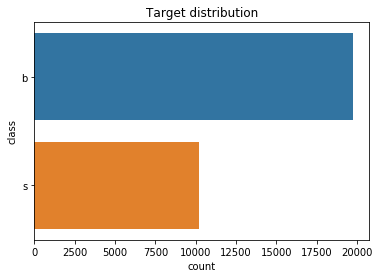

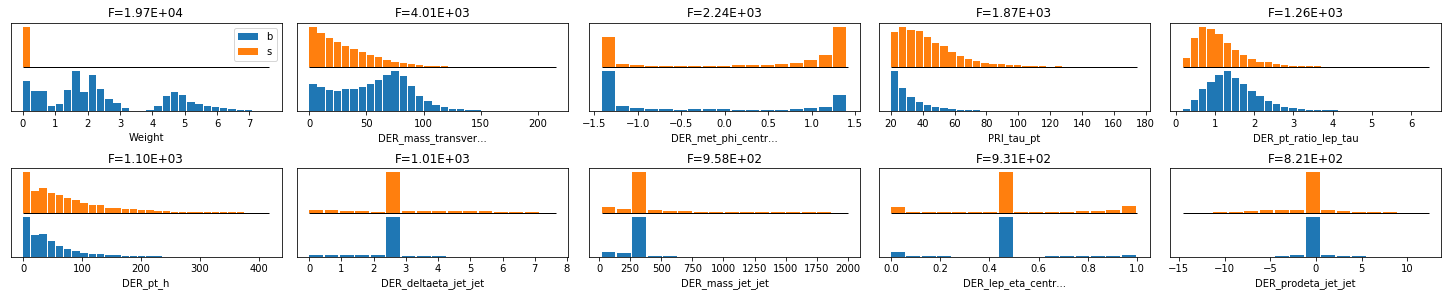

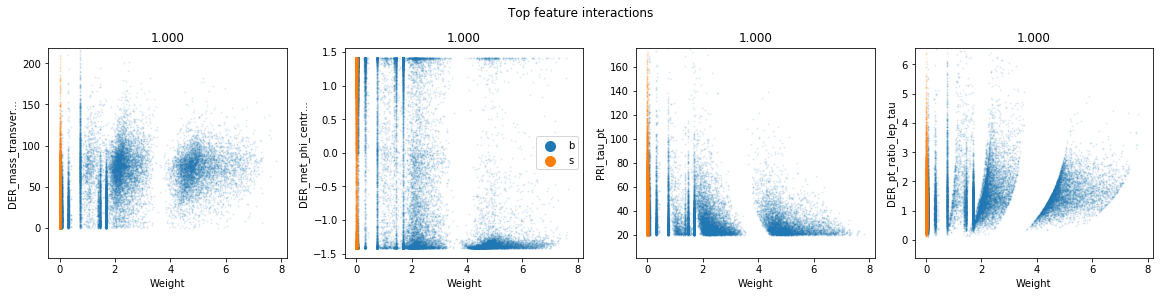

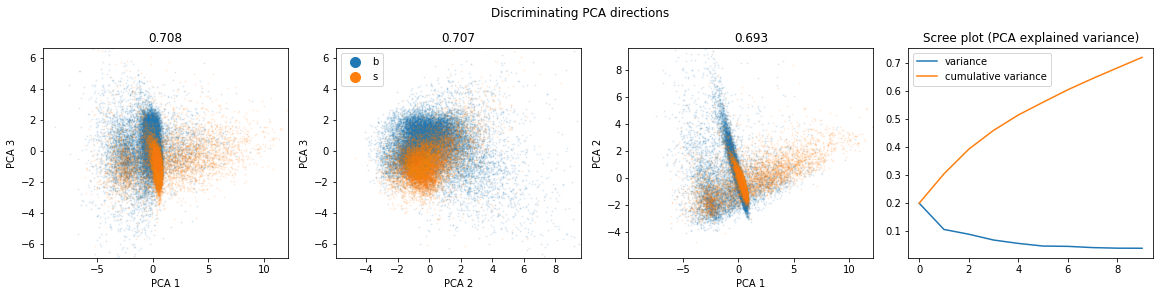

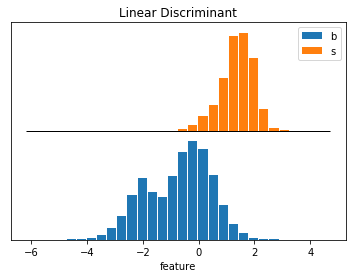

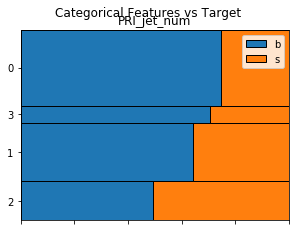

In [10]:
import dabl
dabl.plot(df,'Label')

Target looks like classification
Showing only top 10 of 30 continuous features
Linear Discriminant Analysis training set score: 0.894


[[<Figure size 1440x288 with 10 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

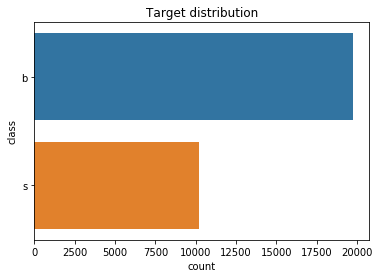

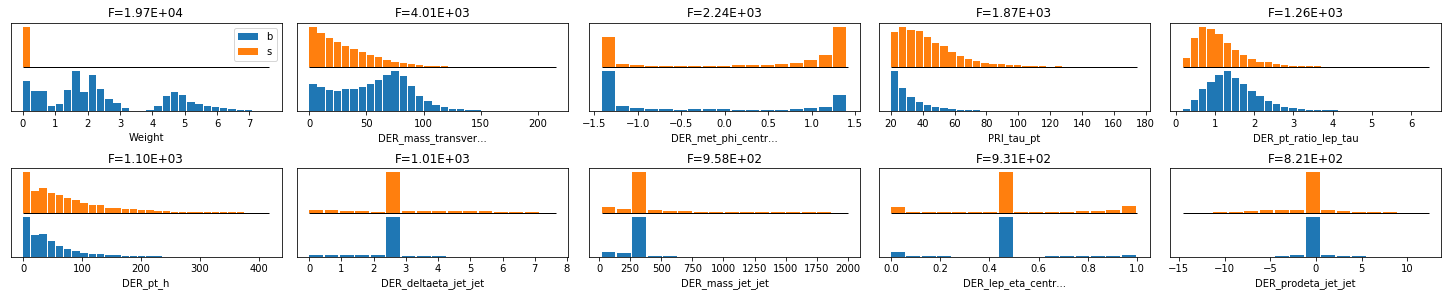

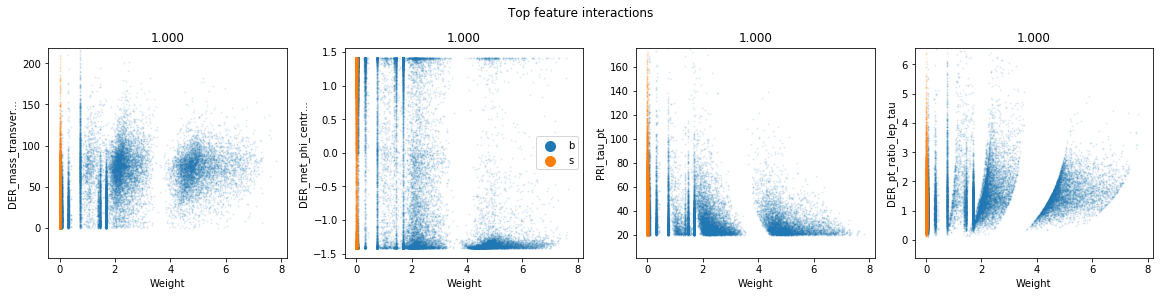

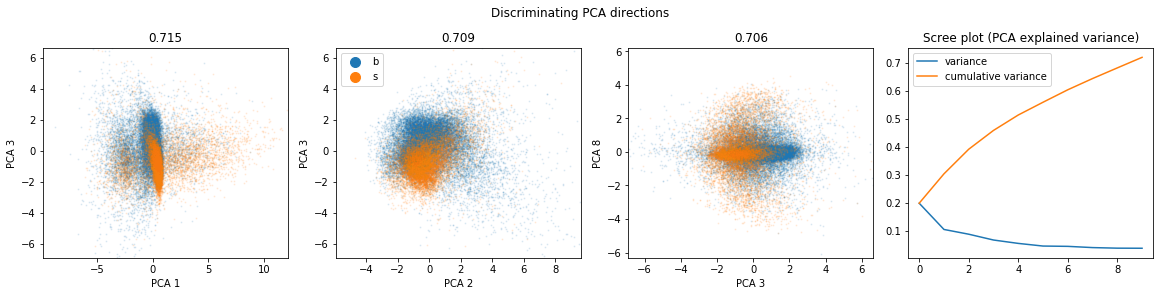

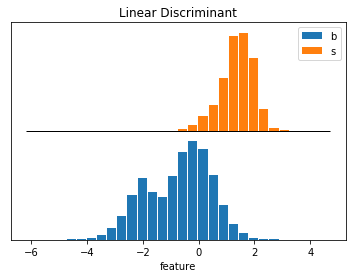

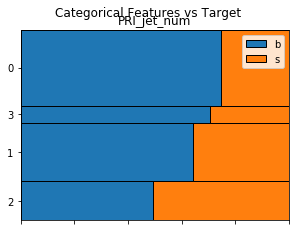

In [11]:
dabl.plot(df,'Label')

In [12]:
#Data Encoding
df['Label'] = df['Label'].replace('s',0)
df['Label'] = df['Label'].replace('b',1)

#### Outlier Treatment

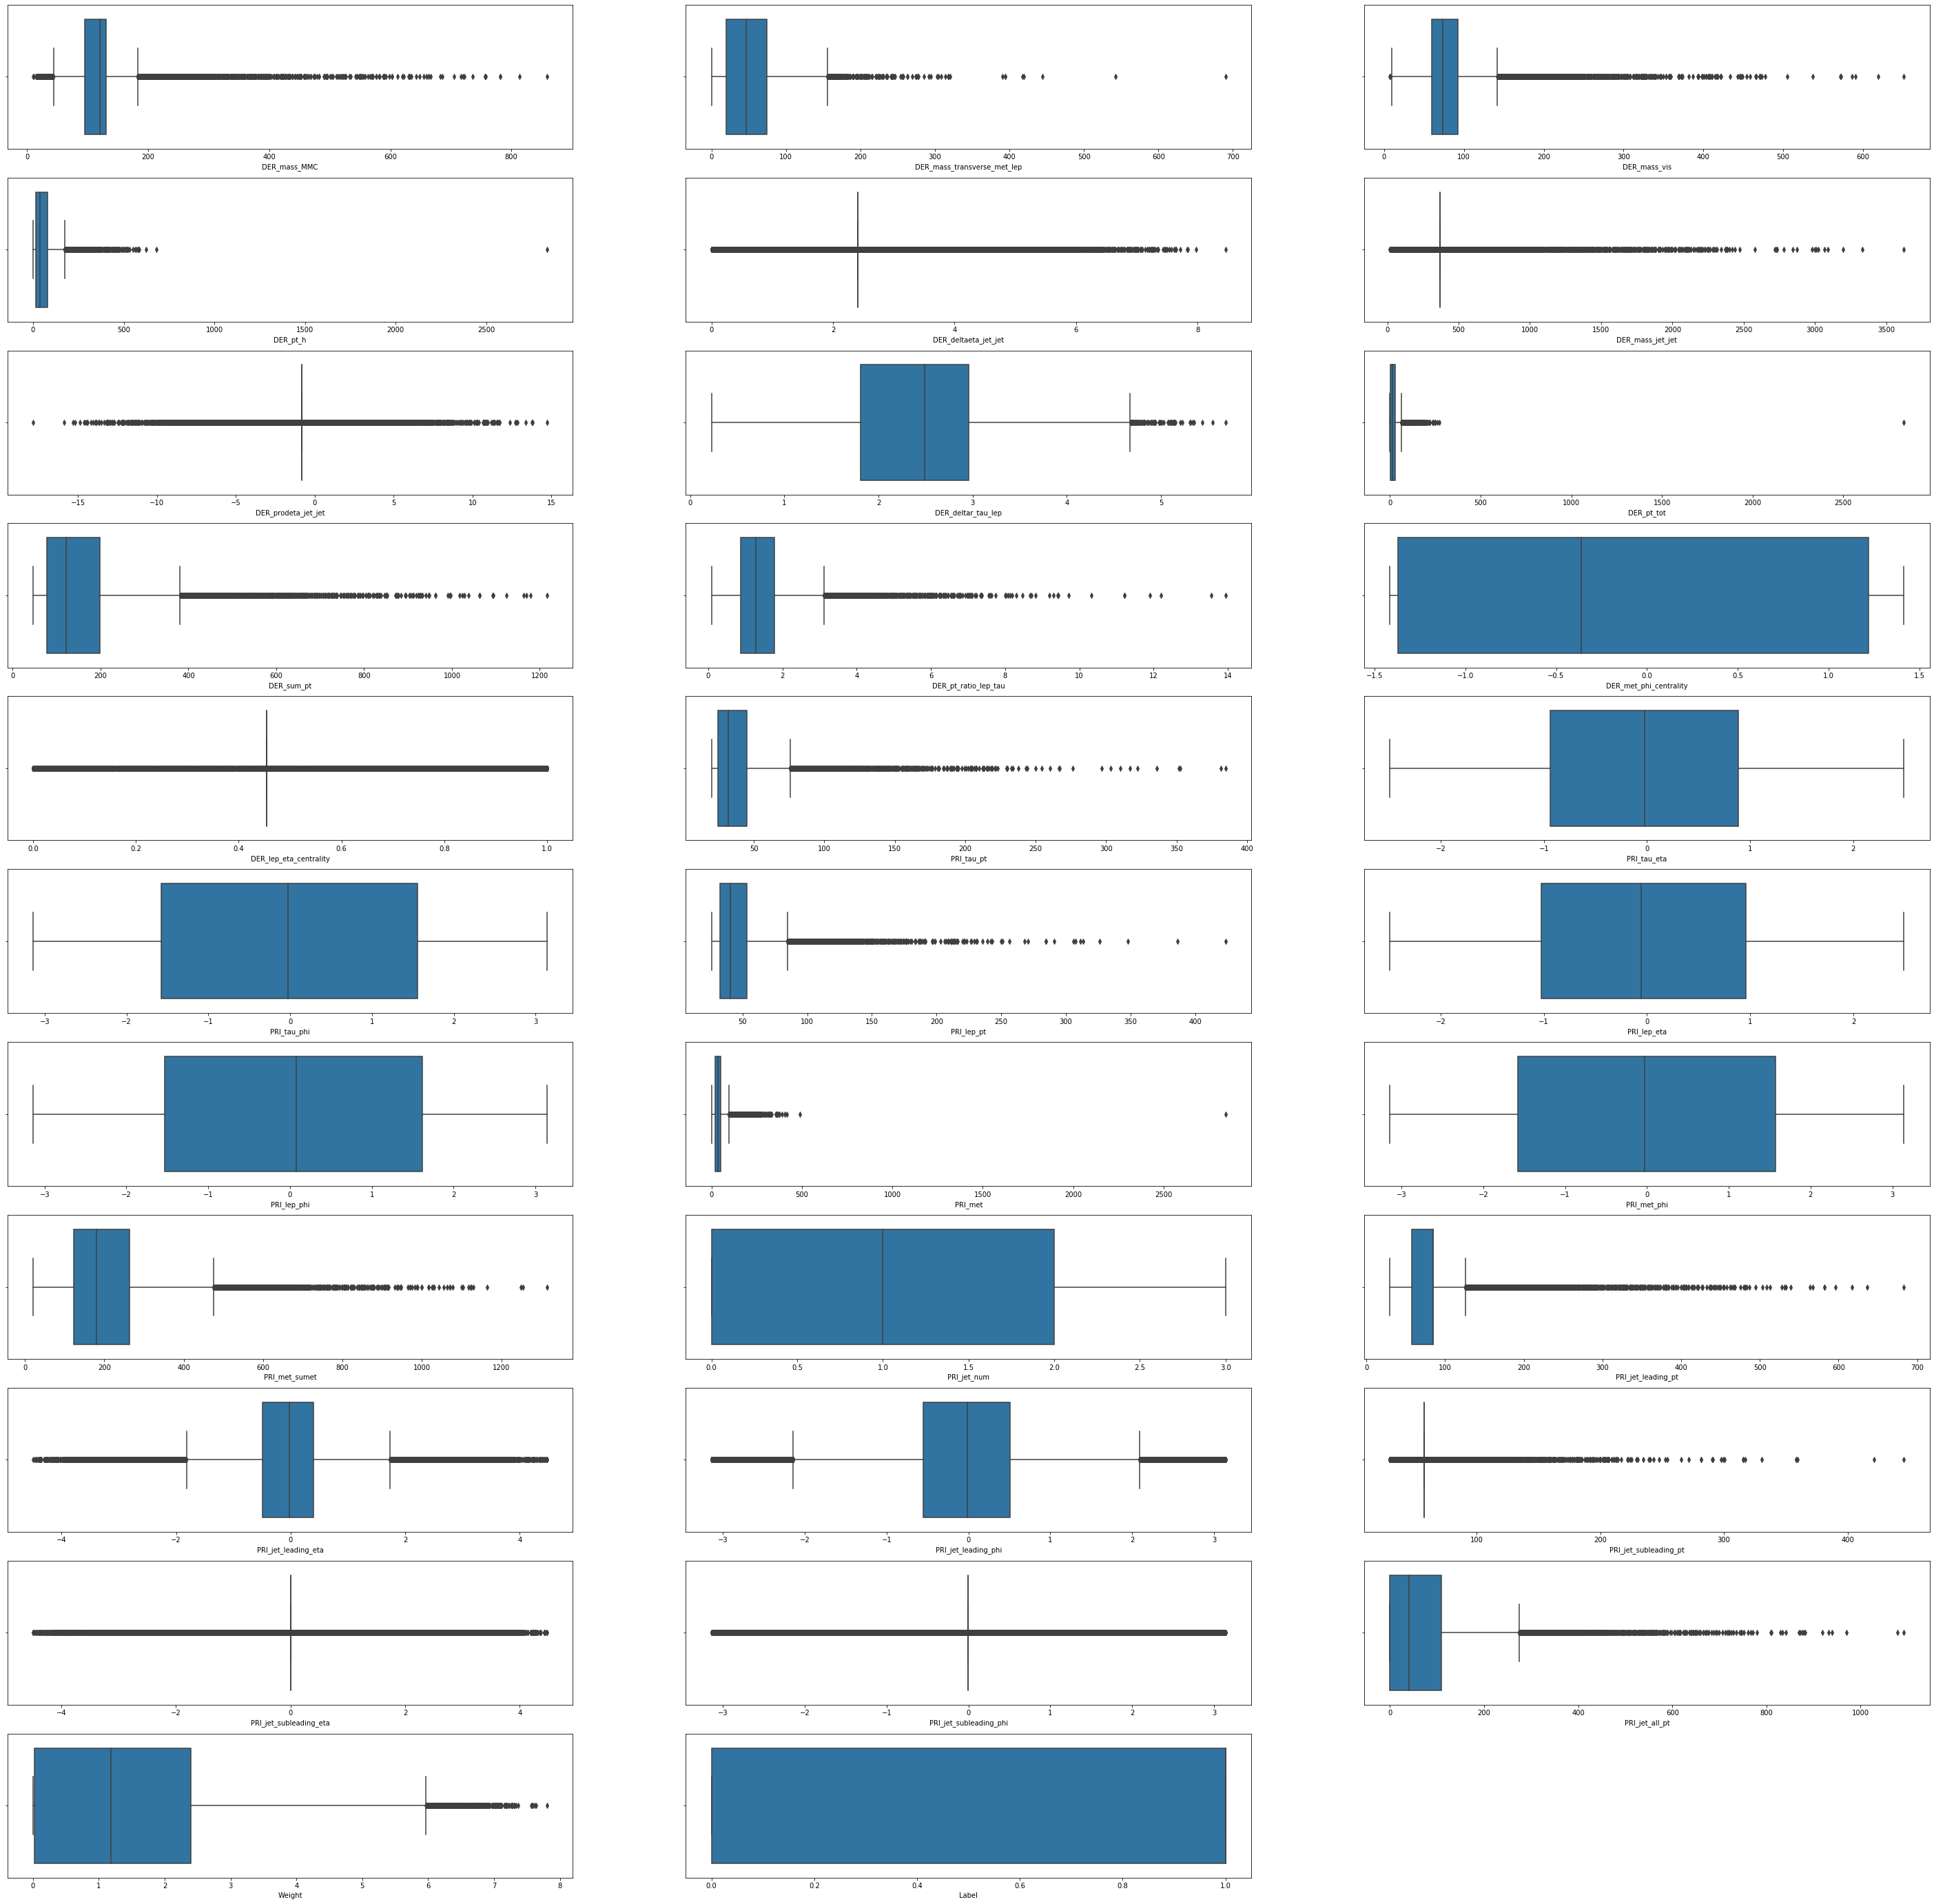

In [13]:
plt.figure(figsize=(50,50))
num_cols = df.columns
i=1
for col in num_cols:
    plt.subplot(11,3,i)
    sns.boxplot(x=df[col])
    #sns.boxplot(x=boston_df['DIS'])
    i+=1
plt.show()    

##### Capping the Outliers

In [14]:
#Competition Distance
percentiles = df['DER_sum_pt'].quantile([0.01,0.99]).values
df['DER_sum_pt'][df['DER_sum_pt'] <= percentiles[0]] = percentiles[0]
df['DER_sum_pt'][df['DER_sum_pt'] >= percentiles[1]] = percentiles[1]

#DER_pt_h
percentiles = df['DER_pt_h'].quantile([0.01,0.99]).values
df['DER_pt_h'][df['DER_pt_h'] <= percentiles[0]] = percentiles[0]
df['DER_pt_h'][df['DER_pt_h'] >= percentiles[1]] = percentiles[1]

#DER_mass_MMC
percentiles = df['DER_mass_MMC'].quantile([0.01,0.99]).values
df['DER_mass_MMC'][df['DER_mass_MMC'] <= percentiles[0]] = percentiles[0]
df['DER_mass_MMC'][df['DER_mass_MMC'] >= percentiles[1]] = percentiles[1]

#DER_prodeta_jet_jet
percentiles = df['DER_prodeta_jet_jet'].quantile([0.01,0.99]).values
df['DER_prodeta_jet_jet'][df['DER_prodeta_jet_jet'] <= percentiles[0]] = percentiles[0]
df['DER_prodeta_jet_jet'][df['DER_prodeta_jet_jet'] >= percentiles[1]] = percentiles[1]

#PRI_met_sumet
percentiles = df['PRI_met_sumet'].quantile([0.01,0.99]).values
df['PRI_met_sumet'][df['PRI_met_sumet'] <= percentiles[0]] = percentiles[0]
df['PRI_met_sumet'][df['PRI_met_sumet'] >= percentiles[1]] = percentiles[1]

#PRI_met
percentiles = df['PRI_met'].quantile([0.01,0.99]).values
df['PRI_met'][df['PRI_met'] <= percentiles[0]] = percentiles[0]
df['PRI_met'][df['PRI_met'] >= percentiles[1]] = percentiles[1]

#DER_mass_transverse_met_lep
percentiles = df['DER_mass_transverse_met_lep'].quantile([0.01,0.99]).values
df['DER_mass_transverse_met_lep'][df['DER_mass_transverse_met_lep'] <= percentiles[0]] = percentiles[0]
df['DER_mass_transverse_met_lep'][df['DER_mass_transverse_met_lep'] >= percentiles[1]] = percentiles[1]

#DER_deltaeta_jet_jet
percentiles = df['DER_deltaeta_jet_jet'].quantile([0.01,0.99]).values
df['DER_deltaeta_jet_jet'][df['DER_deltaeta_jet_jet'] <= percentiles[0]] = percentiles[0]
df['DER_deltaeta_jet_jet'][df['DER_deltaeta_jet_jet'] >= percentiles[1]] = percentiles[1]

#DER_deltar_tau_lep
percentiles = df['DER_deltar_tau_lep'].quantile([0.01,0.99]).values
df['DER_deltar_tau_lep'][df['DER_deltar_tau_lep'] <= percentiles[0]] = percentiles[0]
df['DER_deltar_tau_lep'][df['DER_deltar_tau_lep'] >= percentiles[1]] = percentiles[1]

#DER_pt_ratio_lep_tau
percentiles = df['DER_pt_ratio_lep_tau'].quantile([0.01,0.99]).values
df['DER_pt_ratio_lep_tau'][df['DER_pt_ratio_lep_tau'] <= percentiles[0]] = percentiles[0]
df['DER_pt_ratio_lep_tau'][df['DER_pt_ratio_lep_tau'] >= percentiles[1]] = percentiles[1]

#PRI_tau_pt
percentiles = df['PRI_tau_pt'].quantile([0.01,0.99]).values
df['PRI_tau_pt'][df['PRI_tau_pt'] <= percentiles[0]] = percentiles[0]
df['PRI_tau_pt'][df['PRI_tau_pt'] >= percentiles[1]] = percentiles[1]

#PRI_lep_pt
percentiles = df['PRI_lep_pt'].quantile([0.01,0.99]).values
df['PRI_lep_pt'][df['PRI_lep_pt'] <= percentiles[0]] = percentiles[0]
df['PRI_lep_pt'][df['PRI_lep_pt'] >= percentiles[1]] = percentiles[1]

#PRI_met
percentiles = df['PRI_met'].quantile([0.01,0.99]).values
df['PRI_met'][df['PRI_met'] <= percentiles[0]] = percentiles[0]
df['PRI_met'][df['PRI_met'] >= percentiles[1]] = percentiles[1]

#PRI_jet_subleading_pt
percentiles = df['PRI_jet_subleading_pt'].quantile([0.01,0.99]).values
df['PRI_jet_subleading_pt'][df['PRI_jet_subleading_pt'] <= percentiles[0]] = percentiles[0]
df['PRI_jet_subleading_pt'][df['PRI_jet_subleading_pt'] >= percentiles[1]] = percentiles[1]

#PRI_jet_leading_pt
percentiles = df['PRI_jet_leading_pt'].quantile([0.01,0.99]).values
df['PRI_jet_leading_pt'][df['PRI_jet_leading_pt'] <= percentiles[0]] = percentiles[0]
df['PRI_jet_leading_pt'][df['PRI_jet_leading_pt'] >= percentiles[1]] = percentiles[1]

#DER_pt_tot
percentiles = df['DER_pt_tot'].quantile([0.01,0.99]).values
df['DER_pt_tot'][df['DER_pt_tot'] <= percentiles[0]] = percentiles[0]
df['DER_pt_tot'][df['DER_pt_tot'] >= percentiles[1]] = percentiles[1]

#DER_mass_jet_jet
percentiles = df['DER_mass_jet_jet'].quantile([0.01,0.99]).values
df['DER_mass_jet_jet'][df['DER_mass_jet_jet'] <= percentiles[0]] = percentiles[0]
df['DER_mass_jet_jet'][df['DER_mass_jet_jet'] >= percentiles[1]] = percentiles[1]

#DER_mass_vis
percentiles = df['DER_mass_vis'].quantile([0.01,0.99]).values
df['DER_mass_vis'][df['DER_mass_vis'] <= percentiles[0]] = percentiles[0]
df['DER_mass_vis'][df['DER_mass_vis'] >= percentiles[1]] = percentiles[1]

#PRI_jet_all_pt
percentiles = df['PRI_jet_all_pt'].quantile([0.01,0.99]).values
df['PRI_jet_all_pt'][df['PRI_jet_all_pt'] <= percentiles[0]] = percentiles[0]
df['PRI_jet_all_pt'][df['PRI_jet_all_pt'] >= percentiles[1]] = percentiles[1]

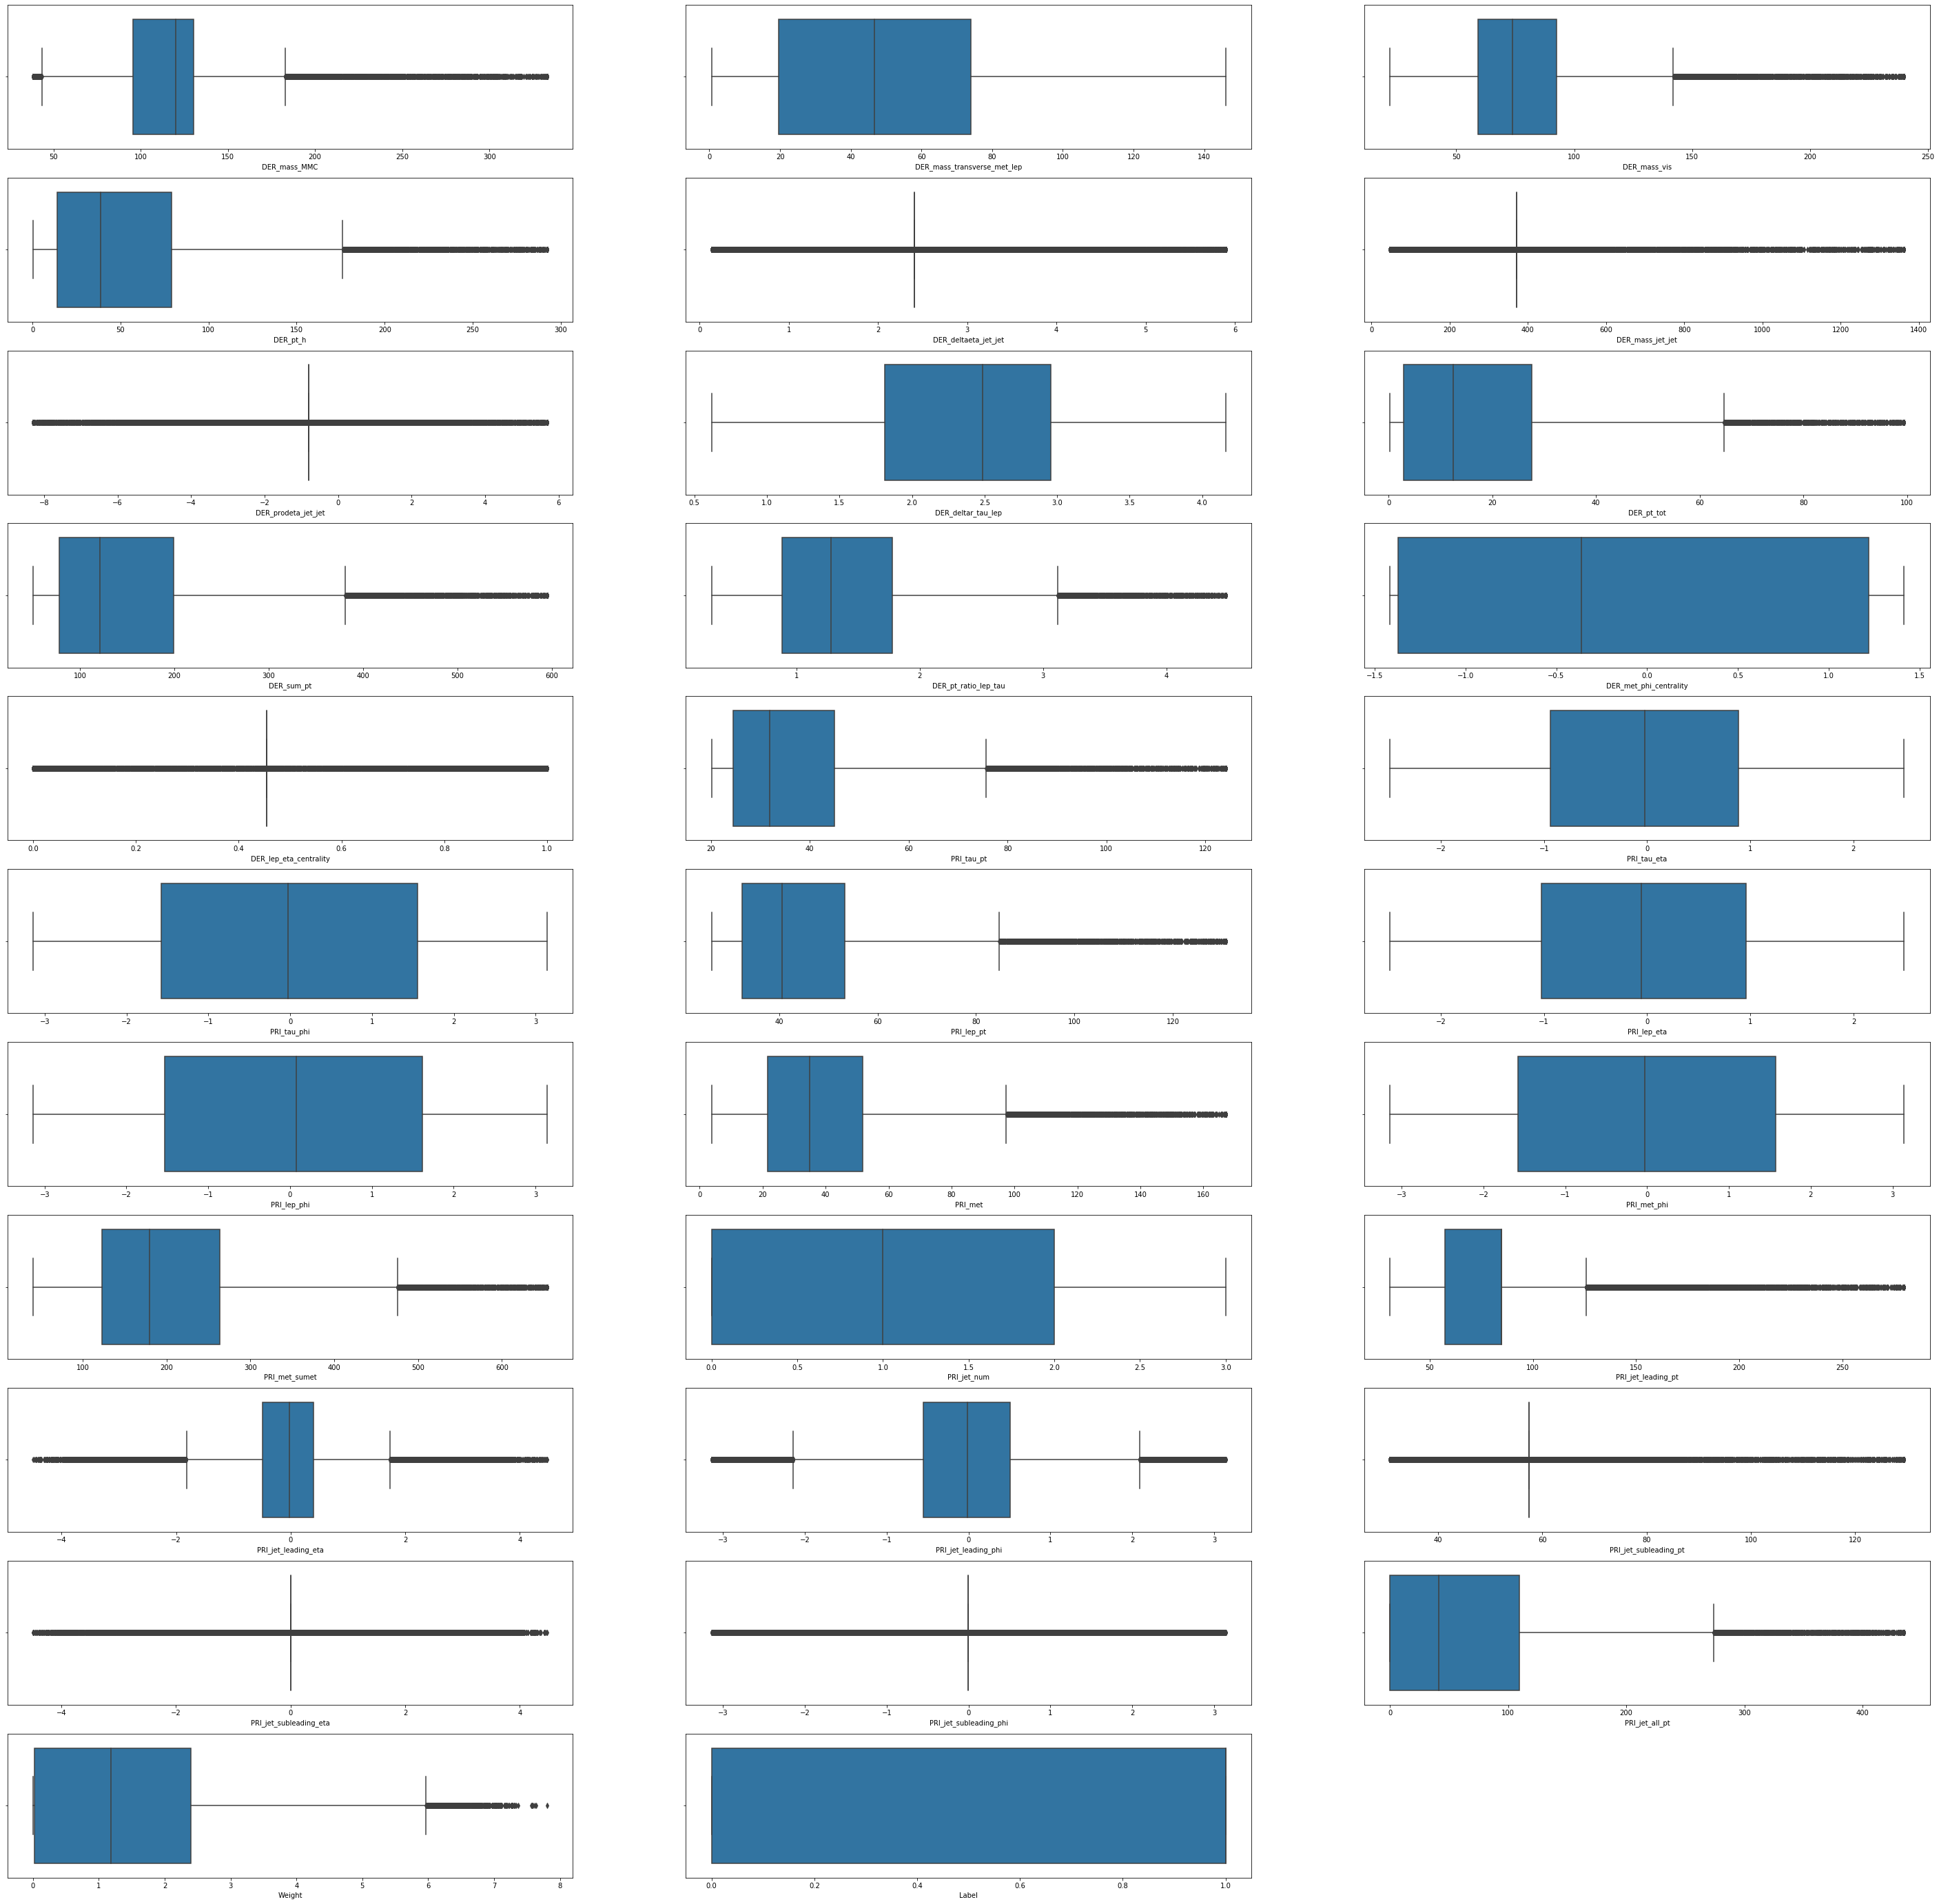

In [15]:
plt.figure(figsize=(50,50))
num_cols = df.columns
i=1
for col in num_cols:
    plt.subplot(11,3,i)
    sns.boxplot(df[col])
    i+=1
plt.show()    

### Correlation

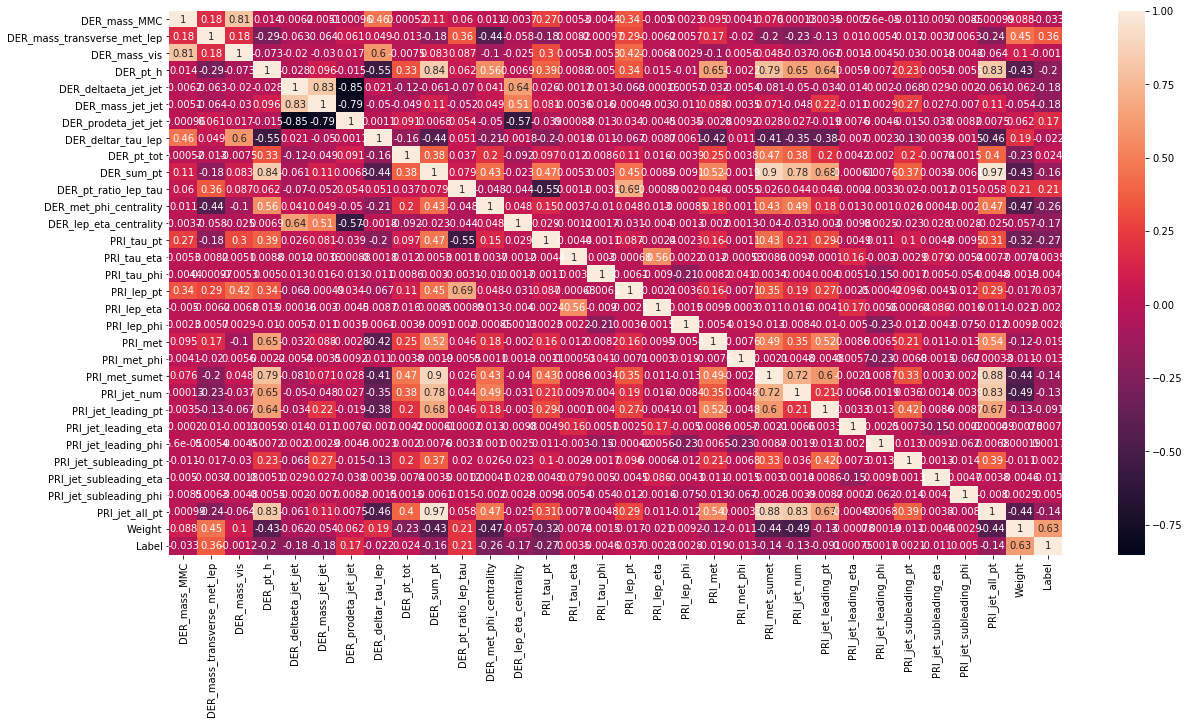

In [16]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

#### Dropping the columns with high correlation value

In [17]:
df = df.drop(['DER_pt_h','DER_deltaeta_jet_jet','DER_sum_pt','PRI_met_sumet','PRI_jet_num'],1)

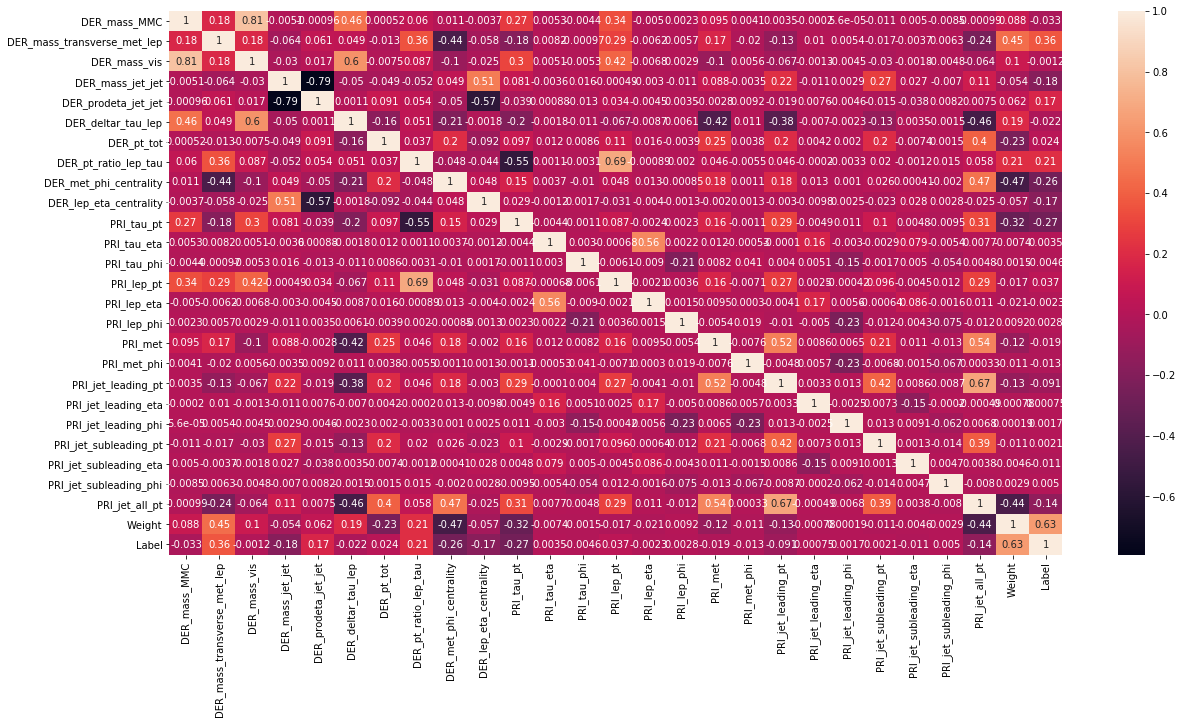

In [18]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [19]:
boson = df['Label'].value_counts().to_frame('counts')
boson

,counts
1,19770
0,10230


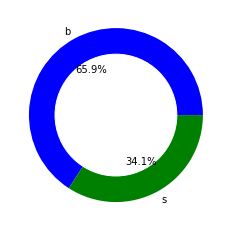

In [20]:
#Data Imbalance
my_circle = plt.Circle((0,0),0.7,color='white')
plt.pie(boson.counts,labels=['b','s'],colors=['blue','green'],autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

##### Taking only few columns for model building

In [21]:
df=df[["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis",'DER_mass_jet_jet',"DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","Label"]]

#### Splitting data into predictors(X) and target(y) variable

In [22]:
X = df.drop(columns=['Label'])
y = df['Label']
X = X.values
y = y.values

In [23]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.2)

In [24]:
#Handling data imbalance with SMOTE function (apply only to train data)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_sample(X_train, y_train)

In [25]:
y_smote = pd.DataFrame(y_smote)
y_smote.describe()

,0
count,27724.000000
mean,0.500000
std,0.500009
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


##### Scaling the data so that all the values will lie in the same range

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_smote = scaler.fit_transform(X_smote)
X_test = scaler.transform(X_test)

In [27]:
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)
X_smote.columns = df.columns[:-1]
X_smote.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot
0,-0.448045,-0.033837,-0.175694,-0.023056,0.041554,0.930902,0.500504
1,-0.416389,0.543714,-0.309062,-0.023056,0.041554,0.735486,-0.840317
2,2.101434,-1.077059,1.897893,-0.233424,0.563013,1.026559,2.207742
3,0.104578,-1.150699,0.205152,-0.023056,0.041554,0.822945,0.402385
4,0.335967,-0.785247,-0.246107,-0.023056,0.041554,-1.340287,-0.735619


#### Building Neural Network

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [29]:
#Define model
def create_baseline():
    model = Sequential()
    model.add(Dense(30, input_dim=7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #Compile model
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=['accuracy'])
    return model

In [30]:
model=create_baseline()

In [31]:
#Fit the model
history = model.fit(X_smote,y_smote,validation_data=(X_test,y_test),epochs=80)

Epoch 1/80
867/867 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.7723 - val_loss: 0.4553 - val_accuracy: 0.7878
Epoch 2/80
867/867 [==============================] - 1s 1ms/step - loss: 0.4590 - accuracy: 0.7850 - val_loss: 0.4421 - val_accuracy: 0.7967
Epoch 3/80
867/867 [==============================] - 1s 1ms/step - loss: 0.4554 - accuracy: 0.7863 - val_loss: 0.4246 - val_accuracy: 0.8057
Epoch 4/80
867/867 [==============================] - 1s 1ms/step - loss: 0.4534 - accuracy: 0.7863 - val_loss: 0.4524 - val_accuracy: 0.7868
Epoch 5/80
867/867 [==============================] - 1s 1ms/step - loss: 0.4488 - accuracy: 0.7890 - val_loss: 0.4237 - val_accuracy: 0.8048
Epoch 6/80
867/867 [==============================] - 1s 1ms/step - loss: 0.4459 - accuracy: 0.7922 - val_loss: 0.4423 - val_accuracy: 0.7912
Epoch 7/80
867/867 [==============================] - 1s 1ms/step - loss: 0.4433 - accuracy: 0.7924 - val_loss: 0.4535 - val_accuracy: 0.7880
Epoch 

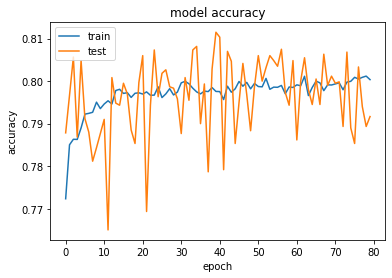

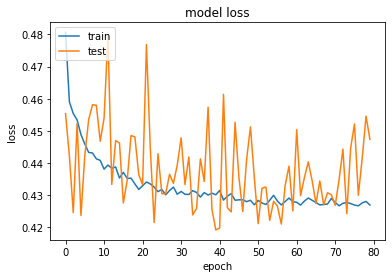

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
#Model Validation
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

188/188 [==============================] - 0s 942us/step - loss: 0.4474 - accuracy: 0.7917
accuracy: 79.17%


In [34]:
#Saving the Model
model = tf.keras.models.load_model('Higgs.h5')